In [3]:
# magic command to reload modules
%load_ext autoreload
%autoreload 2

In [4]:
# append sys.path
import sys
sys.path.append('../src')

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from simulator.DM_model import DM_model
from parse_data.decode_parameter import decode_mat_fitted_parameters

!pwd

/Volumes/GoogleDrive/My Drive/02. Master_NSC/02. 2023FS/NSC_Thesis/codes/notebook


In [39]:
import matplotlib as mpl
# remove top and right axis from plots
mpl.rcParams["axes.spines.right"] = True
mpl.rcParams["axes.spines.top"] = True
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

# remove all edges
mpl.rcParams["axes.edgecolor"] = 'none'
mpl.rcParams['axes.linewidth'] = 2

# transparent background
mpl.rcParams['figure.facecolor'] = 'none'
mpl.rcParams['figure.edgecolor'] = 'none'


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
mpl.rc('font', **font)

## example: call and run the model simulation

In [40]:
# define some input seqCs
seqC1 = [0, 0.4, -0.4]
seqC2 = [0, 0.1, -0.1]
seqC3 = [0, -0.2, -0.2, 0.2, -0.2, 0.2, 0.2, 0, -0.2, 0.2, -0.2, 0, -0.2, 0, -0.2]
seqC4 = [0, 0.1, 0, 0.1, 0.1, -0.1, -0.1, -0.1, 0.1, 0, -0.1, 0.1, 0, 0, 0]

### call with model name and parameters in a list

In [41]:
# load .mat file
filePath = Path('../../data/params/263 models fitPars/data_fitPars_S1.mat')
paramsFitted = decode_mat_fitted_parameters(filePath)
paramsFitted.keys()

dict_keys(['bias', 'sigmas', 'BGLS', 'mechanismsMatrix', 'probRchoiceStoch', 'allModelsList'])

In [42]:
idx = 12
params = {}
params['bias']   = paramsFitted['bias'][idx]
params['sigmas'] = paramsFitted['sigmas'][idx,:]
params['BGLS']   = paramsFitted['BGLS'][idx, :, :]
params['modelName'] = paramsFitted['allModelsList'][idx]
print('Model: ' + paramsFitted['allModelsList'][idx])
# print(params['BGLS'])

Model: G1L0S1x0


In [43]:
model = DM_model(params=params)
a1, probR1 = model.stoch_simulation(seqC1)
# a2, probR2 = model.stoch_simulation(seqC2)
a3, probR3 = model.stoch_simulation(seqC3)
# a4, probR4 = model.stoch_simulation(seqC4)
print('a curve shape:', a1.shape, '\nprobR choice:', probR1)

a curve shape: (301,) 
probR choice: 0.8788663570044293


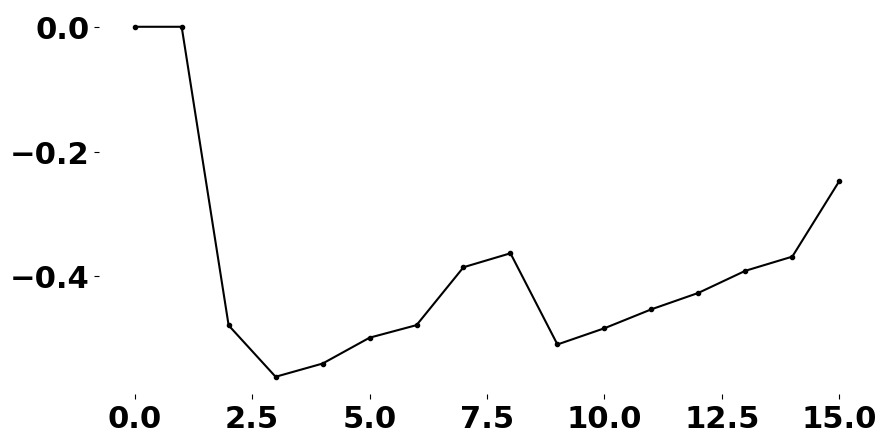

In [46]:
fig = plt.figure(figsize=(10, 5))
plt.plot(a3[::100],'k.-')
fig.patch.set_alpha(0)
fig.set_facecolor('none')

### call with parameter list and model name

In [9]:
modelName = 'B-G-L0S-O-N-'
params = [-0.2, 1, 0, -12, 1.1]
model = DM_model(params=params, modelName=modelName)
a, probR = model.simulate(np.array(seqC1))
print('a curve shape:', a.shape, '\nprobR choice:', probR)

a curve shape: (301,) 
probR choice: 0.6082227697134013


## compare python MATLAB models

In [13]:
# load numpy array
filePath = Path('../../data/compare_python_matlab/probRs_python_speed_test.npy')
pRs_python = np.load(filePath, allow_pickle=True)#.item()
# parse into (263, num_inputs) array
pRs_python

array([[0.18006015, 0.48465214, 0.64226967, ..., 0.36441079, 0.52063756,
        0.26268163],
       [0.17644194, 0.48574196, 0.64753981, ..., 0.37113297, 0.52116095,
        0.26148185],
       [0.17652424, 0.48575368, 0.64741827, ..., 0.37117113, 0.52121296,
        0.26133657],
       ...,
       [0.13195292, 0.5289372 , 0.75239371, ..., 0.35109346, 0.41670026,
        0.25302109],
       [0.14086893, 0.52888152, 0.749085  , ..., 0.33848054, 0.40135235,
        0.23739563],
       [0.13445585, 0.5278151 , 0.75753441, ..., 0.33441818, 0.40025222,
        0.23720686]])

In [14]:
import scipy.io as sio
# load .mat file
filePath = Path('../../data/compare_python_matlab/probRs.mat')
pRs_matlab = sio.loadmat(filePath)['probRs']
pRs_matlab

array([[0.18006015, 0.48465214, 0.64226967, ..., 0.36441079, 0.52063756,
        0.26268163],
       [0.17644194, 0.48574196, 0.64753981, ..., 0.37113297, 0.52116095,
        0.26148185],
       [0.17652424, 0.48575368, 0.64741827, ..., 0.37117113, 0.52121296,
        0.26133657],
       ...,
       [0.13195292, 0.5289372 , 0.75239371, ..., 0.35109346, 0.41670026,
        0.25302109],
       [0.14086893, 0.52888152, 0.749085  , ..., 0.33848054, 0.40135235,
        0.23739563],
       [0.13445585, 0.5278151 , 0.75753441, ..., 0.33441818, 0.40025222,
        0.23720686]])

In [15]:
np.sum(pRs_python-pRs_matlab)

8256.319999999996

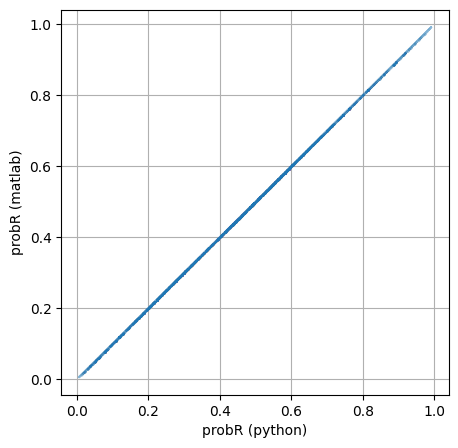

In [26]:
fig = plt.figure(figsize=(5, 5))

# plot observation
k = 214
for idx in range(k,k+1):
    plt.plot(pRs_python[idx,:].reshape(-1), pRs_matlab[idx,:].reshape(-1), marker='o', markersize=0.1, color='tab:blue', alpha=0.5)

plt.xlabel("probR (python)")
plt.ylabel("probR (matlab)")
plt.grid()

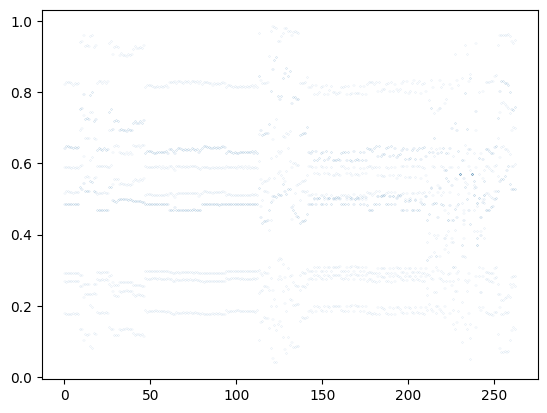

In [6]:
for idx in range(263):
    for j in range(10):
        plt.plot(idx, pRs_python[idx,j].reshape(-1), marker='.', markersize=0.1, color='tab:blue', alpha=0.5)
        plt.plot(idx+0.2, pRs_matlab[idx,j].reshape(-1), marker='.', markersize=0.1, color='tab:blue', alpha=0.5)


In [ ]:
pRs_diff = pRs_matlab - pRs_python

fig = plt.figure(figsize=(7, 5))

# plot observation
plt.plot(np.arange(num_models), np.sum(pRs_diff, axis=1), lw=2)

plt.xlabel("probR (python)")
plt.ylabel("probR (matlab)")

## 设置seeds 正态分布

In [61]:
from scipy.stats import norm
np.random.seed(111)
norm.ppf(np.random.rand(5))

array([ 0.28497976, -0.95784781, -0.16096872,  0.73642013, -0.53789345])

In [62]:
norm.ppf(np.random.rand(5))

array([-1.0400301 , -2.00505985, -0.20131921, -0.71054815, -0.4188683 ])

In [64]:
rn = norm.ppf(np.random.rand(1))
rn

array([-0.713635])

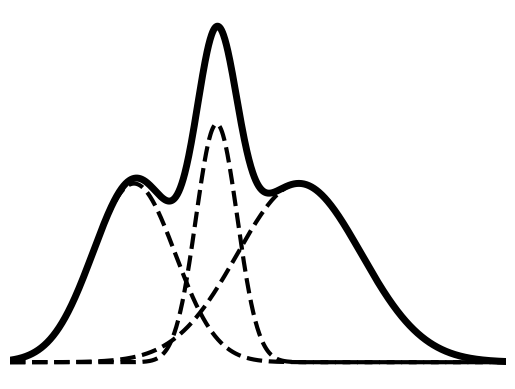

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# generate data
x = np.linspace(-5, 7, 1000)
y1 = 0.3*np.exp(-0.5 * ((x - (-2)) / 1)**2) / np.sqrt(2*np.pi)
y2 = 0.4*np.exp(-0.5 * ((x - 0) / 0.5)**2) / np.sqrt(2*np.pi)
y3 = 0.3*np.exp(-0.5 * ((x - 2) / 1.5)**2) / np.sqrt(2*np.pi)
ysum = y1 + y2 + y3

# plot Gaussian distributions and their summation
fig, ax = plt.subplots()
ax.plot(x, y1, label='Gaussian 1',color='k', linewidth=3, linestyle='--')
ax.plot(x, y2, label='Gaussian 2',color='k', linewidth=3, linestyle='--')
ax.plot(x, y3, label='Gaussian 3',color='k', linewidth=3, linestyle='--')
ax.plot(x, ysum, label='Sum of Gaussians',color='k', linewidth=5)
# ax.legend()
ax.set_xlim([-5,7])
# show plot
ax.axis('off')
# set tranparent background
fig.patch.set_facecolor('none')
plt.show()

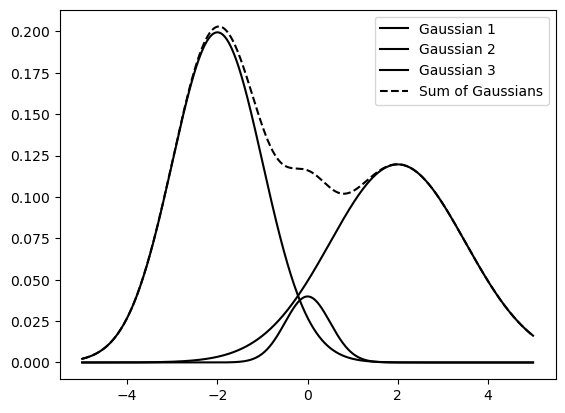

In [45]:
# generate data
mu, sigma = -1, 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y1 = y / (sigma * np.sqrt(2*np.pi))

mu, sigma = 0, 0.8
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y2 = y / (sigma * np.sqrt(2*np.pi))

mu, sigma = 1, 0.3
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = np.exp(-0.5 * ((x - mu) / sigma)**2)
y3 = y / (sigma * np.sqrt(2*np.pi))

# plot Gaussian
fig, ax = plt.subplots()
ax.plot(x, y1+y2+y3, 'k', linewidth=6, label='Gaussian')
ax.set_xlim([-3, 3])
ax.axis('off')
# set tranparent background
fig.patch.set_facecolor('none')

# show plot
plt.show()

## modify & acclerate the python codes